In [222]:
import numpy as np
np.set_printoptions(precision=2, suppress=False)

M = np.array([[0.0001, 0, 0],
            [0, 0.25, 0],
            [0,0, 0.0001]])
V = np.array([[0,1,0],
            [10,0,0],
            [1,0,1]])

np.dot(np.dot(V, M), V.T)

array([[2.5e-01, 0.0e+00, 0.0e+00],
       [0.0e+00, 1.0e-02, 1.0e-03],
       [0.0e+00, 1.0e-03, 2.0e-04]])

In [223]:
np.set_printoptions(precision=5, suppress=True)
np.dot(np.dot(V, M), V.T)

array([[0.25  , 0.    , 0.    ],
       [0.    , 0.01  , 0.001 ],
       [0.    , 0.001 , 0.0002]])

# EKF

['mean_trajectory', 'covariance_trajectory']
['num_steps', 'noise_free_motion', 'real_observations', 'noise_free_observations', 'real_robot_path', 'noise_free_robot_path']


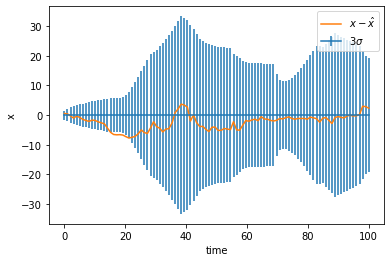

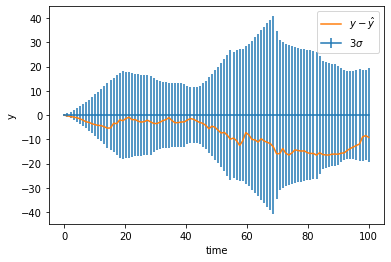

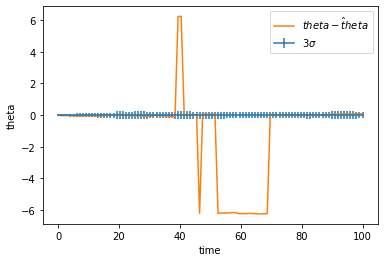

In [109]:
import numpy as np
import matplotlib.pyplot as plt

np.set_printoptions(precision=2, suppress=True)

output_data = np.load(r"output_data.npy")
input_data = np.load(r"input_data.npy")
print(list(output_data))
print(list(input_data))

n = input_data["num_steps"]
time = np.linspace(0, n, n)
errors = input_data["real_robot_path"] - output_data["mean_trajectory"]

for j, name in enumerate(["x", "y", "theta"]):
    yerr = list()
    fig = plt.figure(1)
    for i in range(n):
        yerr.append(3*np.sqrt(output_data["covariance_trajectory"][:,:,i][j][j])) # 3 sigma
    
    
    plt.errorbar(time, np.zeros(time.shape) ,yerr=yerr, label="$3{\sigma}$")
    plt.plot(time, errors[:,j], label=f"${name} - \hat{name}$")
    plt.xlabel("time")
    plt.ylabel(f"{name}")
    plt.legend()
    plt.show()

# PF

['mean_trajectory', 'covariance_trajectory']
['num_steps', 'noise_free_motion', 'real_observations', 'noise_free_observations', 'real_robot_path', 'noise_free_robot_path']


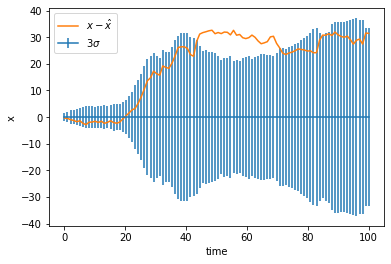

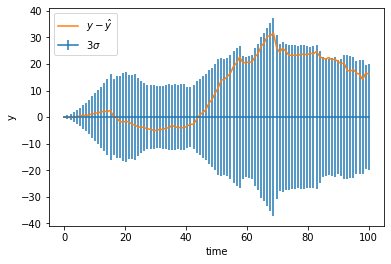

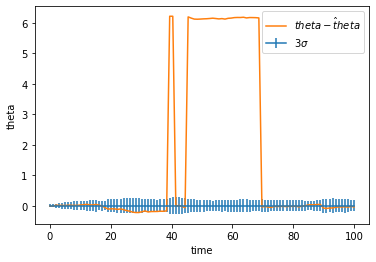

In [103]:
import numpy as np
import matplotlib.pyplot as plt

np.set_printoptions(precision=2, suppress=True)

output_data = np.load(r"output_data.npy")
input_data = np.load(r"input_data.npy")
print(list(output_data))
print(list(input_data))

n = input_data["num_steps"]
time = np.linspace(0, n, n)
errors = input_data["real_robot_path"] - output_data["mean_trajectory"]

for j, name in enumerate(["x", "y", "theta"]):
    yerr = list()
    fig = plt.figure(1)
    for i in range(n):
        yerr.append(3*np.sqrt(output_data["covariance_trajectory"][:,:,i][j][j])) # 3 sigma
    
    
    plt.errorbar(time, np.zeros(time.shape) ,yerr=yerr, label="$3{\sigma}$")
    plt.plot(time, errors[:,j], label=f"${name} - \hat{name}$")
    plt.xlabel("time")
    plt.ylabel(f"{name}")
    plt.legend()    plt.show()

# Task D
### as the sensor or motion noise go toward zero?

In [122]:
import os
from os import walk
import numpy as np


def parse_folder(path2folder):
    files = {"input_data" : dict(), "output_data" : dict()}
    for (dirpath, dirnames, filenames) in walk(path2folder):
        for file in filenames:
            key = file.split("_")[0] + "_" + file.split("_")[1]
            filter_set = os.path.splitext(file.split("_")[-1])[0]
            files[key][filter_set] = os.path.join(dirpath, file)
    return files

path2folder = r"/Users/debunt/Work_Learning/programming/Jupyter/Notebooks_Skoltech/Perception_in_robotics/pset2/out_D/sensor_noise/"
files = parse_folder(path2folder)
files["input_data"]

{'b0': '/Users/debunt/Work_Learning/programming/Jupyter/Notebooks_Skoltech/Perception_in_robotics/pset2/out_D/sensor_noise/input_data_b0.npy',
 'b5': '/Users/debunt/Work_Learning/programming/Jupyter/Notebooks_Skoltech/Perception_in_robotics/pset2/out_D/sensor_noise/input_data_b5.npy',
 'b10': '/Users/debunt/Work_Learning/programming/Jupyter/Notebooks_Skoltech/Perception_in_robotics/pset2/out_D/sensor_noise/input_data_b10.npy',
 'b15': '/Users/debunt/Work_Learning/programming/Jupyter/Notebooks_Skoltech/Perception_in_robotics/pset2/out_D/sensor_noise/input_data_b15.npy'}

/Users/debunt/Work_Learning/programming/Jupyter/venv/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in sqrt


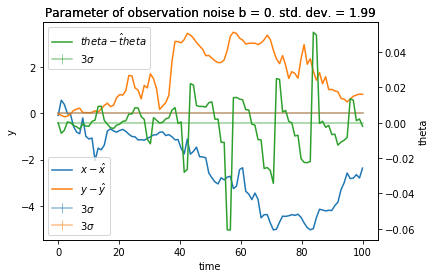

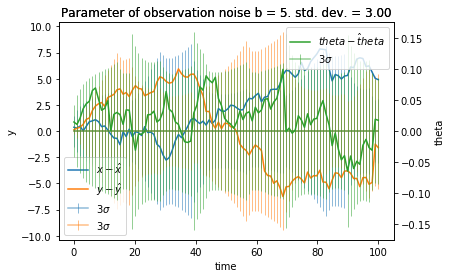

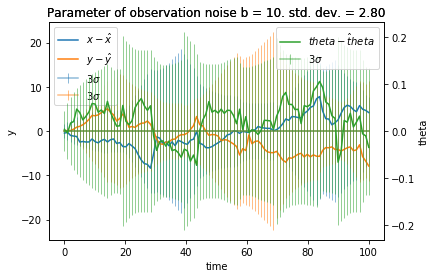

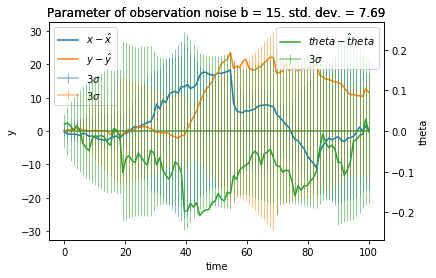

In [183]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

np.set_printoptions(precision=2, suppress=True)
colors = list(mcolors.TABLEAU_COLORS.values())


for k, b in enumerate(sorted(files["output_data"].keys(), key=lambda x: int(x[1:]))):
    fig = plt.figure(1)
    ax = plt.subplot()
    output_data = np.load(files["output_data"][b])
    input_data = np.load(files["input_data"][b])


    n = input_data["num_steps"]
    time = np.linspace(0, n, n)
    errors = input_data["real_robot_path"] - output_data["mean_trajectory"]
    for j, name in enumerate(["x", "y", "theta"]):
        yerr = list()
        if name == "theta":
            ax = ax.twinx()
        for i in range(n):
            yerr.append(3*np.sqrt(output_data["covariance_trajectory"][:,:,i][j][j])) # 3 sigma
        plt.errorbar(time, np.zeros(time.shape) ,yerr=yerr, label="$3{\sigma}$", color=colors[j], alpha=0.5, elinewidth=1, )
        plt.plot(time, errors[:,j], label=f"${name} - \hat{name}$", color=colors[j])
        plt.xlabel("time")
        plt.ylabel(f"{name}")
        std = "{:.2f}".format(np.std(errors))
        plt.title(f"Parameter of observation noise b = {b[1:]}. std. dev. = {std}")
        plt.savefig(f"{b}.png")
        plt.legend()    
    

    plt.show()

### Simulation this different noise in action space

In [198]:
import os
from os import walk
import numpy as np



def parse_folder(path2folder):
    files = {"input_data" : dict(), "output_data" : dict()}
    for (dirpath, dirnames, filenames) in walk(path2folder):
        for file in filenames:
            key = file.split("_")[0] + "_" + file.split("_")[1]
            filter_set = os.path.splitext(file.split("_")[-1])[0]
            files[key][filter_set] = os.path.join(dirpath, file)
    return files

path2folder = r"/Users/debunt/Work_Learning/programming/Jupyter/Notebooks_Skoltech/Perception_in_robotics/pset2/out_D/motion_noise/"
files = parse_folder(path2folder)
files["input_data"]

{'0.01': '/Users/debunt/Work_Learning/programming/Jupyter/Notebooks_Skoltech/Perception_in_robotics/pset2/out_D/motion_noise/input_data_0.01.npy',
 '0.0001': '/Users/debunt/Work_Learning/programming/Jupyter/Notebooks_Skoltech/Perception_in_robotics/pset2/out_D/motion_noise/input_data_0.0001.npy',
 '0.001': '/Users/debunt/Work_Learning/programming/Jupyter/Notebooks_Skoltech/Perception_in_robotics/pset2/out_D/motion_noise/input_data_0.001.npy',
 '0.000001': '/Users/debunt/Work_Learning/programming/Jupyter/Notebooks_Skoltech/Perception_in_robotics/pset2/out_D/motion_noise/input_data_0.000001.npy'}

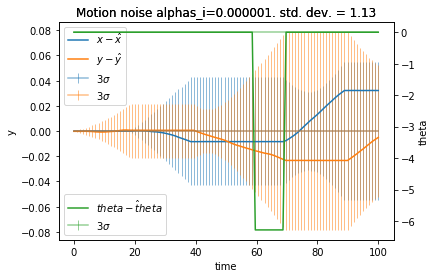

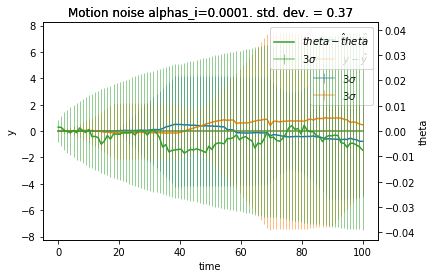

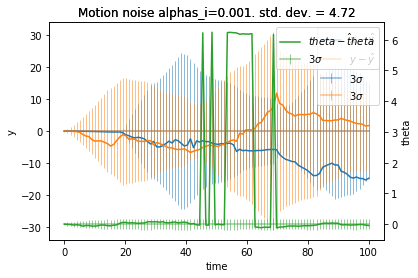

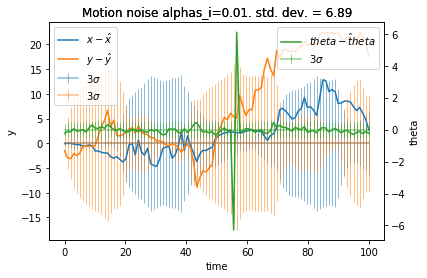

In [200]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

np.set_printoptions(precision=2, suppress=True)
colors = list(mcolors.TABLEAU_COLORS.values())

for k, b in enumerate(sorted(files["output_data"].keys(), key=lambda x: float(x.split("-")[0]))):
    fig = plt.figure(1)
    ax = plt.subplot()
    output_data = np.load(files["output_data"][b])
    input_data = np.load(files["input_data"][b])


    n = input_data["num_steps"]
    time = np.linspace(0, n, n)
    errors = input_data["real_robot_path"] - output_data["mean_trajectory"]
    for j, name in enumerate(["x", "y", "theta"]):
        yerr = list()
        if name == "theta":
            ax = ax.twinx()
        for i in range(n):
            yerr.append(3*np.sqrt(output_data["covariance_trajectory"][:,:,i][j][j])) # 3 sigma
        plt.errorbar(time, np.zeros(time.shape) ,yerr=yerr, label="$3{\sigma}$", color=colors[j], alpha=0.5, elinewidth=1, )
        plt.plot(time, errors[:,j], label=f"${name} - \hat{name}$", color=colors[j])
        plt.xlabel("time")
        plt.ylabel(f"{name}")
        std = "{:.2f}".format(np.std(errors))
        plt.title(f"Motion noise alphas_i={b}. std. dev. = {std}")
        plt.savefig(f"{b}.png")
        plt.legend()    
    

    plt.show()

### Simulation of decreasing particles

#### Parameter of noise

Observation = $\beta = 15 degrees $

Action space = $ \alpha_1 = 0.000001, \alpha_2 = 0.000001, \alpha_3 = 0.000001, \alpha_4 = 0.000001 $

In [202]:
import os
from os import walk
import numpy as np



def parse_folder(path2folder):
    files = {"input_data" : dict(), "output_data" : dict()}
    for (dirpath, dirnames, filenames) in walk(path2folder):
        for file in filenames:
            key = file.split("_")[0] + "_" + file.split("_")[1]
            filter_set = os.path.splitext(file.split("_")[-1])[0]
            files[key][filter_set] = os.path.join(dirpath, file)
    return files

path2folder = r"/Users/debunt/Work_Learning/programming/Jupyter/Notebooks_Skoltech/Perception_in_robotics/pset2/out_D/Particle/"
files = parse_folder(path2folder)
files["input_data"]

{'10': '/Users/debunt/Work_Learning/programming/Jupyter/Notebooks_Skoltech/Perception_in_robotics/pset2/out_D/Particle/input_data_10.npy',
 '100': '/Users/debunt/Work_Learning/programming/Jupyter/Notebooks_Skoltech/Perception_in_robotics/pset2/out_D/Particle/input_data_100.npy',
 '60': '/Users/debunt/Work_Learning/programming/Jupyter/Notebooks_Skoltech/Perception_in_robotics/pset2/out_D/Particle/input_data_60.npy',
 '80': '/Users/debunt/Work_Learning/programming/Jupyter/Notebooks_Skoltech/Perception_in_robotics/pset2/out_D/Particle/input_data_80.npy',
 '30': '/Users/debunt/Work_Learning/programming/Jupyter/Notebooks_Skoltech/Perception_in_robotics/pset2/out_D/Particle/input_data_30.npy'}

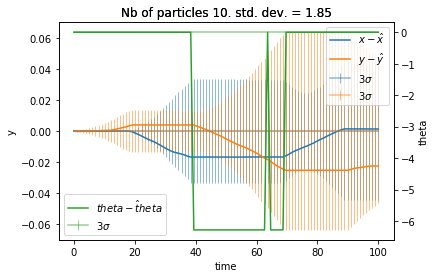

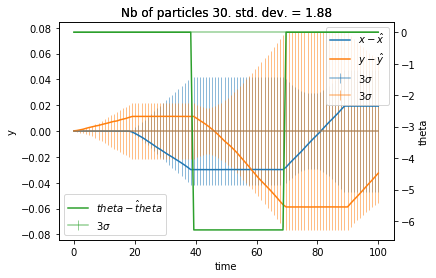

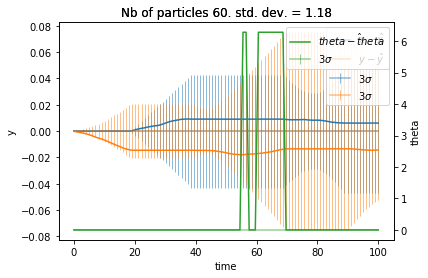

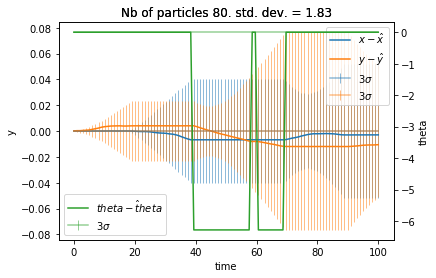

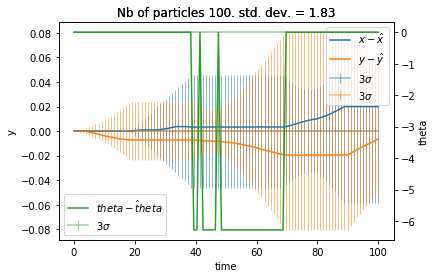

In [206]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

np.set_printoptions(precision=2, suppress=True)
colors = list(mcolors.TABLEAU_COLORS.values())

for k, b in enumerate(sorted(files["output_data"].keys(), key=lambda x: int(x))):
    fig = plt.figure(1)
    ax = plt.subplot()
    output_data = np.load(files["output_data"][b])
    input_data = np.load(files["input_data"][b])


    n = input_data["num_steps"]
    time = np.linspace(0, n, n)
    errors = input_data["real_robot_path"] - output_data["mean_trajectory"]
    for j, name in enumerate(["x", "y", "theta"]):
        yerr = list()
        if name == "theta":
            ax = ax.twinx()
        for i in range(n):
            yerr.append(3*np.sqrt(output_data["covariance_trajectory"][:,:,i][j][j])) # 3 sigma
        plt.errorbar(time, np.zeros(time.shape) ,yerr=yerr, label="$3{\sigma}$", color=colors[j], alpha=0.5, elinewidth=1, )
        plt.plot(time, errors[:,j], label=f"${name} - \hat{name}$", color=colors[j])
        plt.xlabel("time")
        plt.ylabel(f"{name}")
        std = "{:.2f}".format(np.std(errors))
        plt.title(f"Nb of particles {b}. std. dev. = {std}")
        plt.savefig(f"{b}.png")
        plt.legend()    
    

    plt.show()

### Simulation of decreasing particles

#### Parameter of noise

Observation = $\beta = 15 degrees $

Action space = $ \alpha_1 = 0.000001, \alpha_2 = 0.000001, \alpha_3 = 0.000001, \alpha_4 = 0.000001 $

In [202]:
import os
from os import walk
import numpy as np



def parse_folder(path2folder):
    files = {"input_data" : dict(), "output_data" : dict()}
    for (dirpath, dirnames, filenames) in walk(path2folder):
        for file in filenames:
            key = file.split("_")[0] + "_" + file.split("_")[1]
            filter_set = os.path.splitext(file.split("_")[-1])[0]
            files[key][filter_set] = os.path.join(dirpath, file)
    return files

path2folder = r"/Users/debunt/Work_Learning/programming/Jupyter/Notebooks_Skoltech/Perception_in_robotics/pset2/out_D/Particle/"
files = parse_folder(path2folder)
files["input_data"]

{'10': '/Users/debunt/Work_Learning/programming/Jupyter/Notebooks_Skoltech/Perception_in_robotics/pset2/out_D/Particle/input_data_10.npy',
 '100': '/Users/debunt/Work_Learning/programming/Jupyter/Notebooks_Skoltech/Perception_in_robotics/pset2/out_D/Particle/input_data_100.npy',
 '60': '/Users/debunt/Work_Learning/programming/Jupyter/Notebooks_Skoltech/Perception_in_robotics/pset2/out_D/Particle/input_data_60.npy',
 '80': '/Users/debunt/Work_Learning/programming/Jupyter/Notebooks_Skoltech/Perception_in_robotics/pset2/out_D/Particle/input_data_80.npy',
 '30': '/Users/debunt/Work_Learning/programming/Jupyter/Notebooks_Skoltech/Perception_in_robotics/pset2/out_D/Particle/input_data_30.npy'}

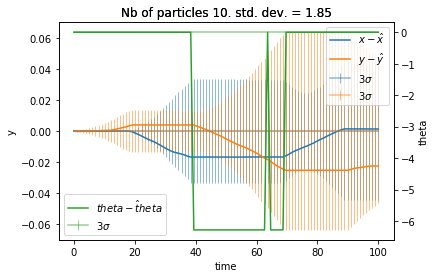

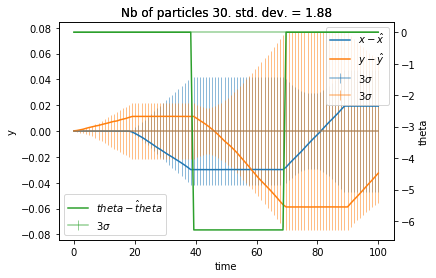

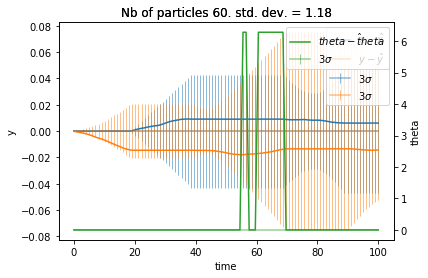

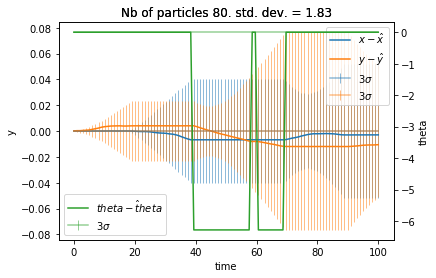

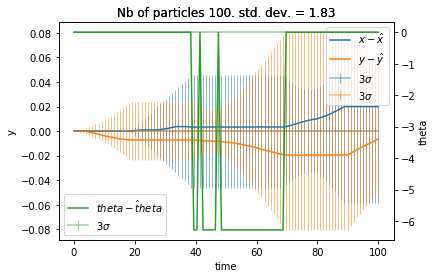

In [206]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

np.set_printoptions(precision=2, suppress=True)
colors = list(mcolors.TABLEAU_COLORS.values())

for k, b in enumerate(sorted(files["output_data"].keys(), key=lambda x: int(x))):
    fig = plt.figure(1)
    ax = plt.subplot()
    output_data = np.load(files["output_data"][b])
    input_data = np.load(files["input_data"][b])


    n = input_data["num_steps"]
    time = np.linspace(0, n, n)
    errors = input_data["real_robot_path"] - output_data["mean_trajectory"]
    for j, name in enumerate(["x", "y", "theta"]):
        yerr = list()
        if name == "theta":
            ax = ax.twinx()
        for i in range(n):
            yerr.append(3*np.sqrt(output_data["covariance_trajectory"][:,:,i][j][j])) # 3 sigma
        plt.errorbar(time, np.zeros(time.shape) ,yerr=yerr, label="$3{\sigma}$", color=colors[j], alpha=0.5, elinewidth=1, )
        plt.plot(time, errors[:,j], label=f"${name} - \hat{name}$", color=colors[j])
        plt.xlabel("time")
        plt.ylabel(f"{name}")
        std = "{:.2f}".format(np.std(errors))
        plt.title(f"Nb of particles {b}. std. dev. = {std}")
        plt.savefig(f"{b}.png")
        plt.legend()    
    

    plt.show()

### Simulation of decreasing particles

#### Parameter of noise

Observation = $\beta = 15 degrees $

Action space = $ \alpha_1 = 0.05, \alpha_2 = 0.001, \alpha_3 = 0.05, \alpha_4 = 0.01 $

In [207]:
import os
from os import walk
import numpy as np



def parse_folder(path2folder):
    files = {"input_data" : dict(), "output_data" : dict()}
    for (dirpath, dirnames, filenames) in walk(path2folder):
        for file in filenames:
            key = file.split("_")[0] + "_" + file.split("_")[1]
            filter_set = os.path.splitext(file.split("_")[-1])[0]
            files[key][filter_set] = os.path.join(dirpath, file)
    return files

path2folder = r"/Users/debunt/Work_Learning/programming/Jupyter/Notebooks_Skoltech/Perception_in_robotics/pset2/out_D/Particle_noise/"
files = parse_folder(path2folder)
files["input_data"]

{'10': '/Users/debunt/Work_Learning/programming/Jupyter/Notebooks_Skoltech/Perception_in_robotics/pset2/out_D/Particle_noise/input_data_10.npy',
 '100': '/Users/debunt/Work_Learning/programming/Jupyter/Notebooks_Skoltech/Perception_in_robotics/pset2/out_D/Particle_noise/input_data_100.npy',
 '50': '/Users/debunt/Work_Learning/programming/Jupyter/Notebooks_Skoltech/Perception_in_robotics/pset2/out_D/Particle_noise/input_data_50.npy',
 '80': '/Users/debunt/Work_Learning/programming/Jupyter/Notebooks_Skoltech/Perception_in_robotics/pset2/out_D/Particle_noise/input_data_80.npy'}

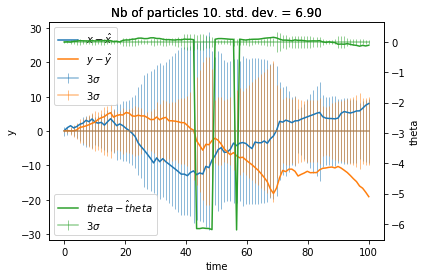

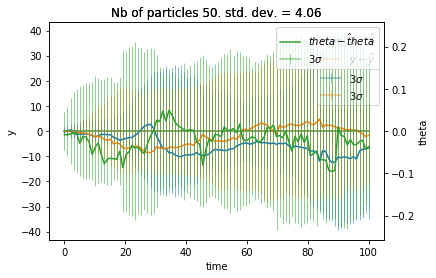

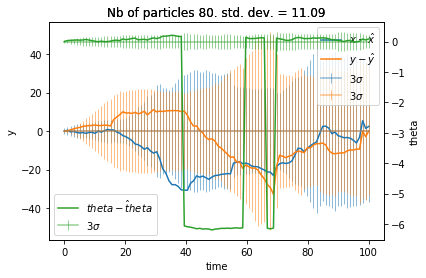

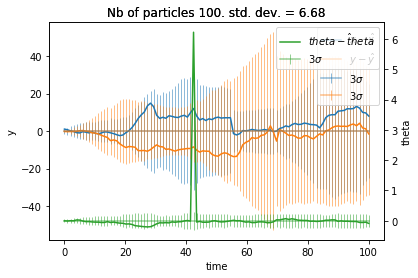

In [218]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

np.set_printoptions(precision=2, suppress=True)
colors = list(mcolors.TABLEAU_COLORS.values())

for k, b in enumerate(sorted(files["output_data"].keys(), key=lambda x: int(x))):
    fig = plt.figure(1)
    ax = plt.subplot()
    output_data = np.load(files["output_data"][b])
    input_data = np.load(files["input_data"][b])


    n = input_data["num_steps"]
    time = np.linspace(0, n, n)
    errors = input_data["real_robot_path"] - output_data["mean_trajectory"]
    for j, name in enumerate(["x", "y", "theta"]):
        yerr = list()
        if name == "theta":
            ax = ax.twinx()
        for i in range(n):
            yerr.append(3*np.sqrt(output_data["covariance_trajectory"][:,:,i][j][j])) # 3 sigma
        plt.errorbar(time, np.zeros(time.shape) ,yerr=yerr, label="$3{\sigma}$", color=colors[j], alpha=0.5, elinewidth=1, )
        plt.plot(time, errors[:,j], label=f"${name} - \hat{name}$", color=colors[j])
        plt.xlabel("time")
        plt.ylabel(f"{name}")
        std = "{:.2f}".format(np.std(errors[:,0:2]))
        plt.title(f"Nb of particles {b}. std. dev. = {std}")
        plt.savefig(f"{b}.png")
        plt.legend()    
    

    plt.show()

In [212]:
errors[:,0:3]

array([[  1.05,  -0.2 ,  -0.  ],
       [  0.71,  -0.29,  -0.01],
       [  0.07,  -0.23,   0.  ],
       [ -0.26,  -0.21,  -0.  ],
       [ -0.88,  -0.17,   0.03],
       [ -0.98,   0.2 ,   0.02],
       [ -0.32,   0.29,  -0.01],
       [ -0.6 ,  -0.11,  -0.03],
       [ -0.96,  -0.22,  -0.03],
       [ -0.47,  -0.95,  -0.04],
       [ -1.15,  -1.05,  -0.04],
       [ -1.5 ,  -1.52,  -0.05],
       [ -1.  ,  -2.21,  -0.06],
       [ -0.43,  -2.83,  -0.06],
       [ -0.51,  -3.43,  -0.03],
       [ -0.94,  -5.13,  -0.06],
       [ -1.36,  -4.73,  -0.04],
       [ -1.94,  -5.17,  -0.06],
       [ -2.42,  -6.78,  -0.08],
       [ -2.11,  -7.88,  -0.08],
       [ -0.84,  -8.8 ,  -0.11],
       [  0.22,  -8.23,  -0.1 ],
       [  1.9 ,  -8.36,  -0.12],
       [  4.1 ,  -8.64,  -0.16],
       [  6.74, -10.44,  -0.17],
       [  8.67, -10.44,  -0.18],
       [ 10.22, -10.36,  -0.2 ],
       [ 13.46, -10.78,  -0.2 ],
       [ 14.9 ,  -9.9 ,  -0.19],
       [ 13.05,  -8.58,  -0.15],
       [  

In [145]:
colors = list(mcolors.TABLEAU_COLORS.values())
colors[1]

'#ff7f0e'